In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('part-merged_1.csv')

In [3]:
df = df.drop('Flight_Number', axis = 1)

### Filling the categorical columns with mode 

In [4]:
categorical_columns = ['Airline_Company', 'Flight_Class', 'Departure_City', 'Arrival_City']

In [5]:
for column in categorical_columns:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)
    print(f"Filled missing values in {column} with mode: {mode_value}")

Filled missing values in Airline_Company with mode: Vistara 
Filled missing values in Flight_Class with mode: ECONOMY
Filled missing values in Departure_City with mode: Delhi
Filled missing values in Arrival_City with mode: Mumbai


/tmp/ipykernel_1467064/3032923611.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)


In [6]:
df.head()

,StandardDateofBooking,StandardDateofJourney,Month_of_Journey,Airline_Company,Flight_Class,Departure_Time,Departure_City,Arrival_Time,Arrival_City,Duration_in_mins,Total Stops,Price
0,2023-01-15,2023-06-03,6,Air India,ECONOMY,19:00,Delhi,07:25,Hyderabad,745.0,1-stop,8895.0
1,2023-01-15,2023-06-03,6,Air India,ECONOMY,09:00,Delhi,21:40,Hyderabad,760.0,NaN,8895.0
2,2023-01-15,2023-03-06,3,Air India,ECONOMY,17:50,Delhi,07:25,Hyderabad,815.0,NaN,8895.0
3,2023-01-15,2023-06-03,6,Air India,ECONOMY,08:00,Delhi,21:40,Hyderabad,820.0,1-stop,8895.0
4,2023-01-15,2023-06-03,6,Air India,ECONOMY,22:30,Delhi,12:25,Hyderabad,835.0,1-stop,8895.0


### Extracting the difference between StandardDateofBooking and StandardDateofJourney

In [7]:
df['StandardDateofBooking'] = pd.to_datetime(df['StandardDateofBooking'], format='%Y-%m-%d')
df['StandardDateofJourney'] = pd.to_datetime(df['StandardDateofJourney'], format='%Y-%m-%d')

df['Difference_in_days'] = (df['StandardDateofJourney'] - df['StandardDateofBooking']).dt.days

df.head()

,StandardDateofBooking,StandardDateofJourney,Month_of_Journey,Airline_Company,Flight_Class,Departure_Time,Departure_City,Arrival_Time,Arrival_City,Duration_in_mins,Total Stops,Price,Difference_in_days
0,2023-01-15,2023-06-03,6,Air India,ECONOMY,19:00,Delhi,07:25,Hyderabad,745.0,1-stop,8895.0,139
1,2023-01-15,2023-06-03,6,Air India,ECONOMY,09:00,Delhi,21:40,Hyderabad,760.0,NaN,8895.0,139
2,2023-01-15,2023-03-06,3,Air India,ECONOMY,17:50,Delhi,07:25,Hyderabad,815.0,NaN,8895.0,50
3,2023-01-15,2023-06-03,6,Air India,ECONOMY,08:00,Delhi,21:40,Hyderabad,820.0,1-stop,8895.0,139
4,2023-01-15,2023-06-03,6,Air India,ECONOMY,22:30,Delhi,12:25,Hyderabad,835.0,1-stop,8895.0,139


In [8]:
df.head()

,StandardDateofBooking,StandardDateofJourney,Month_of_Journey,Airline_Company,Flight_Class,Departure_Time,Departure_City,Arrival_Time,Arrival_City,Duration_in_mins,Total Stops,Price,Difference_in_days
0,2023-01-15,2023-06-03,6,Air India,ECONOMY,19:00,Delhi,07:25,Hyderabad,745.0,1-stop,8895.0,139
1,2023-01-15,2023-06-03,6,Air India,ECONOMY,09:00,Delhi,21:40,Hyderabad,760.0,NaN,8895.0,139
2,2023-01-15,2023-03-06,3,Air India,ECONOMY,17:50,Delhi,07:25,Hyderabad,815.0,NaN,8895.0,50
3,2023-01-15,2023-06-03,6,Air India,ECONOMY,08:00,Delhi,21:40,Hyderabad,820.0,1-stop,8895.0,139
4,2023-01-15,2023-06-03,6,Air India,ECONOMY,22:30,Delhi,12:25,Hyderabad,835.0,1-stop,8895.0,139


In [9]:
df[df['Difference_in_days']<0].head()

,StandardDateofBooking,StandardDateofJourney,Month_of_Journey,Airline_Company,Flight_Class,Departure_Time,Departure_City,Arrival_Time,Arrival_City,Duration_in_mins,Total Stops,Price,Difference_in_days
3151,2023-01-15,2023-01-02,1,Air India,BUSINESS,06:50,Delhi,09:05,Kolkata,135.0,non-stop,27976.0,-13
3152,2023-01-15,2023-01-02,1,Vistara,BUSINESS,06:30,Delhi,08:20,Kolkata,110.0,non-stop,27976.0,-13
3153,2023-01-15,2023-01-02,1,Vistara,BUSINESS,07:30,Delhi,09:35,Kolkata,125.0,non-stop,27976.0,-13
3154,2023-01-15,2023-01-02,1,Air India,BUSINESS,12:10,Delhi,14:30,Kolkata,140.0,non-stop,27976.0,-13
3155,2023-01-15,2023-01-02,1,Air India,BUSINESS,11:15,Delhi,16:45,Kolkata,330.0,1-stop,33849.0,-13


### As for some columns difference in date is negative let's drop that column and convert the dates which are having the difference in dates as negative.

In [10]:
df = df.drop(['Difference_in_days'], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458869 entries, 0 to 458868
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   StandardDateofBooking  458869 non-null  datetime64[ns]
 1   StandardDateofJourney  458869 non-null  datetime64[ns]
 2   Month_of_Journey       458869 non-null  int64         
 3   Airline_Company        458869 non-null  object        
 4   Flight_Class           458869 non-null  object        
 5   Departure_Time         449704 non-null  object        
 6   Departure_City         458869 non-null  object        
 7   Arrival_Time           449710 non-null  object        
 8   Arrival_City           458869 non-null  object        
 9   Duration_in_mins       449719 non-null  float64       
 10  Total Stops            449690 non-null  object        
 11  Price                  449697 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), 

In [12]:
df.head()

,StandardDateofBooking,StandardDateofJourney,Month_of_Journey,Airline_Company,Flight_Class,Departure_Time,Departure_City,Arrival_Time,Arrival_City,Duration_in_mins,Total Stops,Price
0,2023-01-15,2023-06-03,6,Air India,ECONOMY,19:00,Delhi,07:25,Hyderabad,745.0,1-stop,8895.0
1,2023-01-15,2023-06-03,6,Air India,ECONOMY,09:00,Delhi,21:40,Hyderabad,760.0,NaN,8895.0
2,2023-01-15,2023-03-06,3,Air India,ECONOMY,17:50,Delhi,07:25,Hyderabad,815.0,NaN,8895.0
3,2023-01-15,2023-06-03,6,Air India,ECONOMY,08:00,Delhi,21:40,Hyderabad,820.0,1-stop,8895.0
4,2023-01-15,2023-06-03,6,Air India,ECONOMY,22:30,Delhi,12:25,Hyderabad,835.0,1-stop,8895.0


In [13]:
df['StandardDateofJourney'] = df['StandardDateofJourney'].replace({
    pd.Timestamp('2023-01-03'): pd.Timestamp('2023-03-01'),
    pd.Timestamp('2023-01-02'): pd.Timestamp('2023-02-01')
})

In [14]:
df['StandardDateofBooking'] = pd.to_datetime(df['StandardDateofBooking'], format='%Y-%m-%d')
df['StandardDateofJourney'] = pd.to_datetime(df['StandardDateofJourney'], format='%Y-%m-%d')

df['Difference_in_days'] = (df['StandardDateofJourney'] - df['StandardDateofBooking']).dt.days

df.head()

,StandardDateofBooking,StandardDateofJourney,Month_of_Journey,Airline_Company,Flight_Class,Departure_Time,Departure_City,Arrival_Time,Arrival_City,Duration_in_mins,Total Stops,Price,Difference_in_days
0,2023-01-15,2023-06-03,6,Air India,ECONOMY,19:00,Delhi,07:25,Hyderabad,745.0,1-stop,8895.0,139
1,2023-01-15,2023-06-03,6,Air India,ECONOMY,09:00,Delhi,21:40,Hyderabad,760.0,NaN,8895.0,139
2,2023-01-15,2023-03-06,3,Air India,ECONOMY,17:50,Delhi,07:25,Hyderabad,815.0,NaN,8895.0,50
3,2023-01-15,2023-06-03,6,Air India,ECONOMY,08:00,Delhi,21:40,Hyderabad,820.0,1-stop,8895.0,139
4,2023-01-15,2023-06-03,6,Air India,ECONOMY,22:30,Delhi,12:25,Hyderabad,835.0,1-stop,8895.0,139


In [15]:
df.isnull().sum()

StandardDateofBooking       0
StandardDateofJourney       0
Month_of_Journey            0
Airline_Company             0
Flight_Class                0
Departure_Time           9165
Departure_City              0
Arrival_Time             9159
Arrival_City                0
Duration_in_mins         9150
Total Stops              9179
Price                    9172
Difference_in_days          0
dtype: int64

In [16]:
def change_into_Datetime(col):
    df[col] = pd.to_datetime(df[col])

In [17]:
for feature in ['Departure_Time', 'Arrival_Time' , 'StandardDateofJourney']:
    change_into_Datetime(feature)

/tmp/ipykernel_1467064/381762946.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
/tmp/ipykernel_1467064/381762946.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


In [18]:
df["Journey_day"] = df['StandardDateofJourney'].dt.day
df["Journey_month"] = df['StandardDateofJourney'].dt.month

In [19]:
df.isnull().sum()

StandardDateofBooking       0
StandardDateofJourney       0
Month_of_Journey            0
Airline_Company             0
Flight_Class                0
Departure_Time           9165
Departure_City              0
Arrival_Time             9159
Arrival_City                0
Duration_in_mins         9150
Total Stops              9179
Price                    9172
Difference_in_days          0
Journey_day                 0
Journey_month               0
dtype: int64

In [20]:
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

In [21]:
extract_hour_min(df , "Departure_Time")

,StandardDateofBooking,StandardDateofJourney,Month_of_Journey,Airline_Company,Flight_Class,Departure_Time,Departure_City,Arrival_Time,Arrival_City,Duration_in_mins,Total Stops,Price,Difference_in_days,Journey_day,Journey_month,Departure_Time_hour,Departure_Time_minute
0,2023-01-15,2023-06-03,6,Air India,ECONOMY,2024-07-05 19:00:00,Delhi,2024-07-05 07:25:00,Hyderabad,745.0,1-stop,8895.0,139,3,6,19.0,0.0
1,2023-01-15,2023-06-03,6,Air India,ECONOMY,2024-07-05 09:00:00,Delhi,2024-07-05 21:40:00,Hyderabad,760.0,NaN,8895.0,139,3,6,9.0,0.0
2,2023-01-15,2023-03-06,3,Air India,ECONOMY,2024-07-05 17:50:00,Delhi,2024-07-05 07:25:00,Hyderabad,815.0,NaN,8895.0,50,6,3,17.0,50.0


In [22]:
extract_hour_min(df , "Arrival_Time")

,StandardDateofBooking,StandardDateofJourney,Month_of_Journey,Airline_Company,Flight_Class,Departure_Time,Departure_City,Arrival_Time,Arrival_City,Duration_in_mins,Total Stops,Price,Difference_in_days,Journey_day,Journey_month,Departure_Time_hour,Departure_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,2023-01-15,2023-06-03,6,Air India,ECONOMY,2024-07-05 19:00:00,Delhi,2024-07-05 07:25:00,Hyderabad,745.0,1-stop,8895.0,139,3,6,19.0,0.0,7.0,25.0
1,2023-01-15,2023-06-03,6,Air India,ECONOMY,2024-07-05 09:00:00,Delhi,2024-07-05 21:40:00,Hyderabad,760.0,NaN,8895.0,139,3,6,9.0,0.0,21.0,40.0
2,2023-01-15,2023-03-06,3,Air India,ECONOMY,2024-07-05 17:50:00,Delhi,2024-07-05 07:25:00,Hyderabad,815.0,NaN,8895.0,50,6,3,17.0,50.0,7.0,25.0


In [23]:
df.head()

,StandardDateofBooking,StandardDateofJourney,Month_of_Journey,Airline_Company,Flight_Class,Departure_Time,Departure_City,Arrival_Time,Arrival_City,Duration_in_mins,Total Stops,Price,Difference_in_days,Journey_day,Journey_month,Departure_Time_hour,Departure_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,2023-01-15,2023-06-03,6,Air India,ECONOMY,2024-07-05 19:00:00,Delhi,2024-07-05 07:25:00,Hyderabad,745.0,1-stop,8895.0,139,3,6,19.0,0.0,7.0,25.0
1,2023-01-15,2023-06-03,6,Air India,ECONOMY,2024-07-05 09:00:00,Delhi,2024-07-05 21:40:00,Hyderabad,760.0,NaN,8895.0,139,3,6,9.0,0.0,21.0,40.0
2,2023-01-15,2023-03-06,3,Air India,ECONOMY,2024-07-05 17:50:00,Delhi,2024-07-05 07:25:00,Hyderabad,815.0,NaN,8895.0,50,6,3,17.0,50.0,7.0,25.0
3,2023-01-15,2023-06-03,6,Air India,ECONOMY,2024-07-05 08:00:00,Delhi,2024-07-05 21:40:00,Hyderabad,820.0,1-stop,8895.0,139,3,6,8.0,0.0,21.0,40.0
4,2023-01-15,2023-06-03,6,Air India,ECONOMY,2024-07-05 22:30:00,Delhi,2024-07-05 12:25:00,Hyderabad,835.0,1-stop,8895.0,139,3,6,22.0,30.0,12.0,25.0


In [24]:
cols_to_drop = ["StandardDateofBooking", "StandardDateofJourney", "Month_of_Journey"]

df.drop(cols_to_drop , axis=1 , inplace=True )

In [25]:
cols_to_drop = ["Departure_Time", "Arrival_Time"]

df.drop(cols_to_drop , axis=1 , inplace=True )

In [26]:
df.isnull().sum()

Airline_Company             0
Flight_Class                0
Departure_City              0
Arrival_City                0
Duration_in_mins         9150
Total Stops              9179
Price                    9172
Difference_in_days          0
Journey_day                 0
Journey_month               0
Departure_Time_hour      9165
Departure_Time_minute    9165
Arrival_Time_hour        9159
Arrival_Time_minute      9159
dtype: int64

In [27]:
df['Departure_Time_hour'].fillna('-1', inplace=True)
df['Arrival_Time_hour'].fillna('-1', inplace=True)

/tmp/ipykernel_1467064/3696962715.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Departure_Time_hour'].fillna('-1', inplace=True)
/tmp/ipykernel_1467064/3696962715.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Departure_Time_hour'].fillna('-1', inplace=True)
/tmp/ipykernel_1467064/3696962715.py:2: FutureWarning: A value is trying to 

In [28]:
df['Departure_Time_hour'] = pd.to_numeric(df['Departure_Time_hour'], errors='coerce').fillna(-1).astype(int)
df['Arrival_Time_hour'] = pd.to_numeric(df['Arrival_Time_hour'], errors='coerce').fillna(-1).astype(int)

In [29]:
def flight_dep_time(hour):
    if hour == -1:
        return "missing"
    elif (hour > 4) and (hour <= 8):
        return "Early Morning"
    elif (hour > 8) and (hour <= 12):
        return "Morning"
    elif (hour > 12) and (hour <= 16):
        return "Noon"
    elif (hour > 16) and (hour <= 20):
        return "Evening"
    elif (hour > 20) and (hour <= 24):
        return "Night"
    else:
        return "Late Night"

df['Departure_Time_Category'] = df['Departure_Time_hour'].apply(flight_dep_time)
df['Arrival_Time_Category'] = df['Arrival_Time_hour'].apply(flight_dep_time)

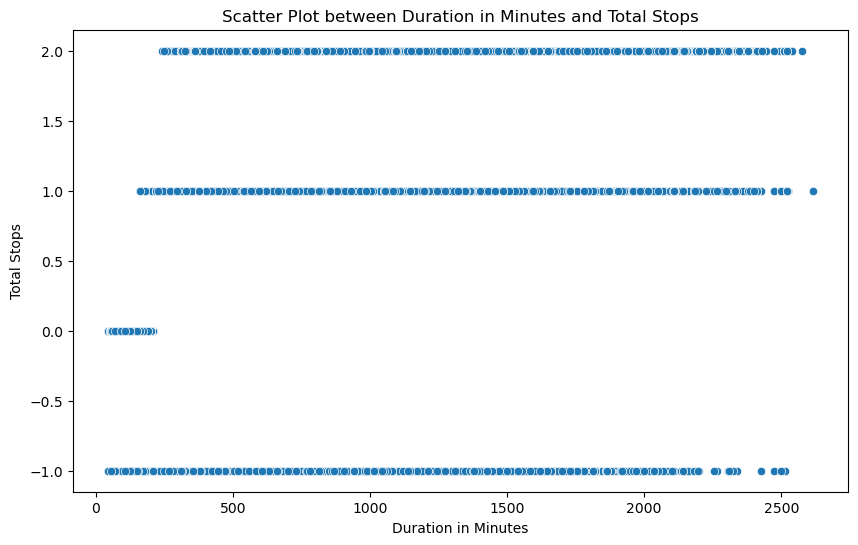

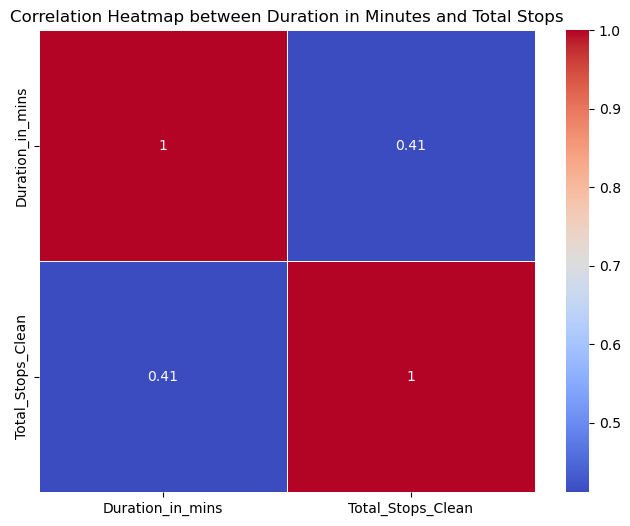

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def standardize_stops(stops):
    if pd.isna(stops):
        return -1
    stops = stops.lower()
    if 'non-stop' in stops:
        return 0
    elif '1-stop' in stops:
        return 1
    elif '2+' in stops:
        return 2
    else:
        return 1 

df['Total_Stops_Clean'] = df['Total Stops'].apply(standardize_stops)

df['Duration_in_mins'] = pd.to_numeric(df['Duration_in_mins'], errors='coerce')

df = df.dropna(subset=['Duration_in_mins', 'Total_Stops_Clean'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_in_mins', y='Total_Stops_Clean', data=df)
plt.title('Scatter Plot between Duration in Minutes and Total Stops')
plt.xlabel('Duration in Minutes')
plt.ylabel('Total Stops')
plt.show()

correlation_matrix = df[['Duration_in_mins', 'Total_Stops_Clean']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap between Duration in Minutes and Total Stops')
plt.show()

In [31]:
df.head()

,Airline_Company,Flight_Class,Departure_City,Arrival_City,Duration_in_mins,Total Stops,Price,Difference_in_days,Journey_day,Journey_month,Departure_Time_hour,Departure_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Departure_Time_Category,Arrival_Time_Category,Total_Stops_Clean
0,Air India,ECONOMY,Delhi,Hyderabad,745.0,1-stop,8895.0,139,3,6,19,0.0,7,25.0,Evening,Early Morning,1
1,Air India,ECONOMY,Delhi,Hyderabad,760.0,NaN,8895.0,139,3,6,9,0.0,21,40.0,Morning,Night,-1
2,Air India,ECONOMY,Delhi,Hyderabad,815.0,NaN,8895.0,50,6,3,17,50.0,7,25.0,Evening,Early Morning,-1
3,Air India,ECONOMY,Delhi,Hyderabad,820.0,1-stop,8895.0,139,3,6,8,0.0,21,40.0,Early Morning,Night,1
4,Air India,ECONOMY,Delhi,Hyderabad,835.0,1-stop,8895.0,139,3,6,22,30.0,12,25.0,Night,Morning,1


In [32]:
mean_prices = df[df['Price'] != -1].groupby('Airline_Company')['Price'].mean()

df['Price'] = df['Price'].fillna('-1')

def replace_with_mean(row):
    if row['Price'] == -1:
        return mean_prices.get(row['Airline_Company'], np.nan)
    else:
        return row['Price']

df['Price'] = df.apply(replace_with_mean, axis=1)


In [33]:
categorical_columns = ['Departure_Time_Category', 'Arrival_Time_Category']

for column in categorical_columns:
    mode_value = df[column].mode()[0]
    df[column] = df[column].replace('missing', mode_value)
    print(f"Filled 'missing' values in {column} with mode: {mode_value}")

Filled 'missing' values in Departure_Time_Category with mode: Early Morning
Filled 'missing' values in Arrival_Time_Category with mode: Evening


In [34]:
# filling the missing values in the column 'Total_Stops_Clean' which is denoted as -1. with the mode 
mode_value = df['Total_Stops_Clean'][df['Total_Stops_Clean'] != -1].mode()[0]
df['Total_Stops_Clean'] = df['Total_Stops_Clean'].replace(-1, mode_value)

In [35]:
df['Price'] = df['Price'].astype(int)
mean_prices = df[df['Price'] != -1].groupby('Airline_Company')['Price'].mean()

print("Airline_Company wise mean Price:")
print(mean_prices)

def replace_with_mean(row):
    if row['Price'] == -1:
        return mean_prices.get(row['Airline_Company'], np.nan)
    else:
        return row['Price']
df['Price'] = df.apply(replace_with_mean, axis=1)

Airline_Company wise mean Price:
Airline_Company
Air India       26938.807504
AirAsia          7086.714892
AkasaAir         3570.106303
AllianceAir      4073.787234
GO FIRST         8025.846206
Indigo           8198.683541
SpiceJet         8124.328959
StarAir          9549.711864
Vistara         27074.894059
Name: Price, dtype: float64


<Axes: xlabel='Price', ylabel='Duration_in_mins'>

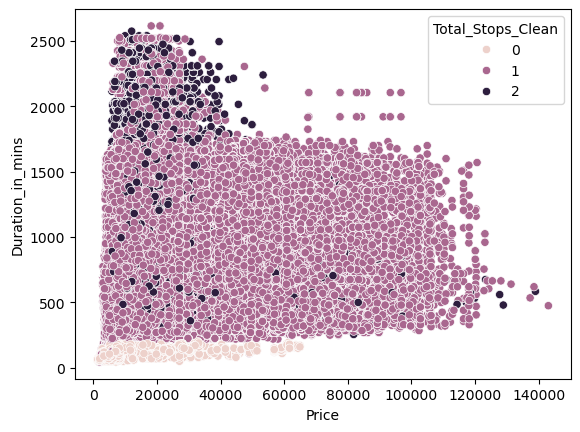

In [36]:
sns.scatterplot(x="Price" , y="Duration_in_mins" , hue="Total_Stops_Clean", data=df)

In [37]:
cols_to_dropp = ["Total Stops", "Departure_Time_minute", "Arrival_Time_minute"]

df.drop(cols_to_dropp, axis=1, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449719 entries, 0 to 458868
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Airline_Company          449719 non-null  object 
 1   Flight_Class             449719 non-null  object 
 2   Departure_City           449719 non-null  object 
 3   Arrival_City             449719 non-null  object 
 4   Duration_in_mins         449719 non-null  float64
 5   Price                    449719 non-null  float64
 6   Difference_in_days       449719 non-null  int64  
 7   Journey_day              449719 non-null  int32  
 8   Journey_month            449719 non-null  int32  
 9   Departure_Time_hour      449719 non-null  int64  
 10  Arrival_Time_hour        449719 non-null  int64  
 11  Departure_Time_Category  449719 non-null  object 
 12  Arrival_Time_Category    449719 non-null  object 
 13  Total_Stops_Clean        449719 non-null  int64  
dtypes: float6

### Finding Outlier for column 'Duration_in_mins'

In [39]:
percentile25_duration = df['Duration_in_mins'].quantile(0.25)
percentile75_duration = df['Duration_in_mins'].quantile(0.75)

In [40]:
iqr_duration = percentile75_duration - percentile25_duration
iqr_duration

595.0

In [41]:
upper_limit_duration = percentile75_duration + 1.5 * iqr_duration
lower_limit_duration = percentile25_duration - 1.5 * iqr_duration

print("Upper limit",upper_limit_duration)
print("Lower limit",lower_limit_duration)

Upper limit 1882.5
Lower limit -497.5


### Capping

In [42]:
new_df_cap = df.copy()

new_df_cap['Duration_in_mins'] = np.where(
    new_df_cap['Duration_in_mins'] > upper_limit_duration,
    upper_limit_duration,
    np.where(
        new_df_cap['Duration_in_mins'] < lower_limit_duration,
        lower_limit_duration,
        new_df_cap['Duration_in_mins']
    )
)

### Finding Outlier for column 'Price'

In [43]:
percentile25_Price = df['Price'].quantile(0.25)
percentile75_Price = df['Price'].quantile(0.75)

In [44]:
iqr = percentile75_Price - percentile25_Price
iqr

25052.0

In [45]:
upper_limit_Price = percentile75_Price + 1.5 * iqr
lower_limit_Price = percentile25_Price - 1.5 * iqr

print("Upper limit",upper_limit_Price)
print("Lower limit",lower_limit_Price)

Upper limit 71406.0
Lower limit -28802.0


### Capping

In [46]:
new_df_cap['Price'] = np.where(
    new_df_cap['Price'] > upper_limit_Price,
    upper_limit_Price,
    np.where(
        new_df_cap['Price'] < lower_limit_Price,
        lower_limit_Price,
        new_df_cap['Price']
    )
)

In [47]:
new_df_cap.head()

,Airline_Company,Flight_Class,Departure_City,Arrival_City,Duration_in_mins,Price,Difference_in_days,Journey_day,Journey_month,Departure_Time_hour,Arrival_Time_hour,Departure_Time_Category,Arrival_Time_Category,Total_Stops_Clean
0,Air India,ECONOMY,Delhi,Hyderabad,745.0,8895.0,139,3,6,19,7,Evening,Early Morning,1
1,Air India,ECONOMY,Delhi,Hyderabad,760.0,8895.0,139,3,6,9,21,Morning,Night,1
2,Air India,ECONOMY,Delhi,Hyderabad,815.0,8895.0,50,6,3,17,7,Evening,Early Morning,1
3,Air India,ECONOMY,Delhi,Hyderabad,820.0,8895.0,139,3,6,8,21,Early Morning,Night,1
4,Air India,ECONOMY,Delhi,Hyderabad,835.0,8895.0,139,3,6,22,12,Night,Morning,1


<Axes: ylabel='Price'>

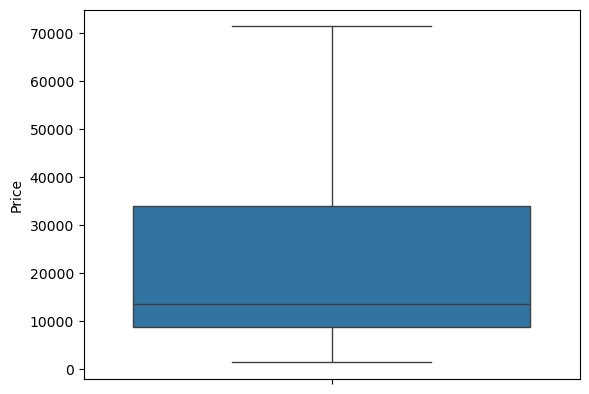

In [48]:
sns.boxplot(new_df_cap['Price'])

<Axes: ylabel='Duration_in_mins'>

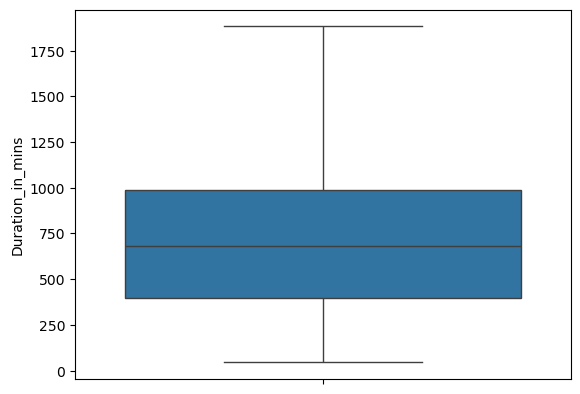

In [49]:
sns.boxplot(new_df_cap['Duration_in_mins'])

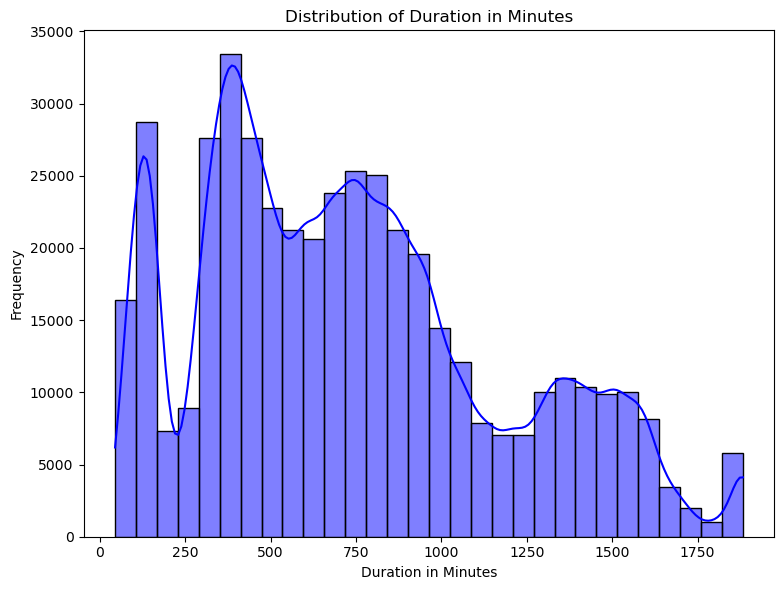

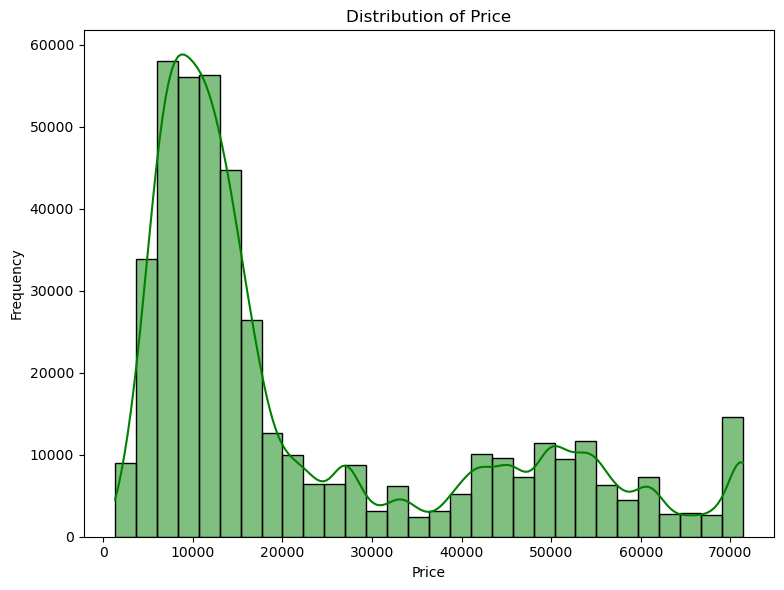

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(new_df_cap['Duration_in_mins'], kde=True, bins=30, color='blue')
plt.title('Distribution of Duration in Minutes')
plt.xlabel('Duration in Minutes')
plt.ylabel('Frequency')

# Box plot
# plt.subplot(1, 2, 2)
# sns.boxplot(y=new_df_cap['Duration_in_mins'], color='blue')
# plt.title('Box Plot of Duration in Minutes')

plt.tight_layout()
plt.show()

# Plot the distribution of 'Price'
plt.figure(figsize=(15, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(new_df_cap['Price'], kde=True, bins=30, color='green')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Box plot
# plt.subplot(1, 2, 2)
# sns.boxplot(y=new_df_cap['Price'], color='green')
# plt.title('Box Plot of Price')

plt.tight_layout()
plt.show()

In [51]:
df_std = new_df_cap.copy()

In [52]:
df_std.head()

,Airline_Company,Flight_Class,Departure_City,Arrival_City,Duration_in_mins,Price,Difference_in_days,Journey_day,Journey_month,Departure_Time_hour,Arrival_Time_hour,Departure_Time_Category,Arrival_Time_Category,Total_Stops_Clean
0,Air India,ECONOMY,Delhi,Hyderabad,745.0,8895.0,139,3,6,19,7,Evening,Early Morning,1
1,Air India,ECONOMY,Delhi,Hyderabad,760.0,8895.0,139,3,6,9,21,Morning,Night,1
2,Air India,ECONOMY,Delhi,Hyderabad,815.0,8895.0,50,6,3,17,7,Evening,Early Morning,1
3,Air India,ECONOMY,Delhi,Hyderabad,820.0,8895.0,139,3,6,8,21,Early Morning,Night,1
4,Air India,ECONOMY,Delhi,Hyderabad,835.0,8895.0,139,3,6,22,12,Night,Morning,1


In [53]:
df_std['Log_Duration'] = np.log(df_std['Duration_in_mins'] + 1)  # Add 1 to avoid log(0)
df_std['Log_Price'] = np.log(df_std['Price'] + 1)

In [54]:
df_std['Sqrt_Duration'] = np.sqrt(df_std['Duration_in_mins'])
df_std['Sqrt_Price'] = np.sqrt(df_std['Price'])

In [55]:
from scipy.stats import boxcox

# Apply Box-Cox transformation
df_std['BoxCox_Duration'], _ = boxcox(df_std['Duration_in_mins'] + 1)  # Add 1 to avoid issues with zero values
df_std['BoxCox_Price'], _ = boxcox(df_std['Price'] + 1)


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Apply normalization
df_std['Normalized_Duration'] = scaler.fit_transform(df_std[['Duration_in_mins']])
df_std['Normalized_Price'] = scaler.fit_transform(df_std[['Price']])


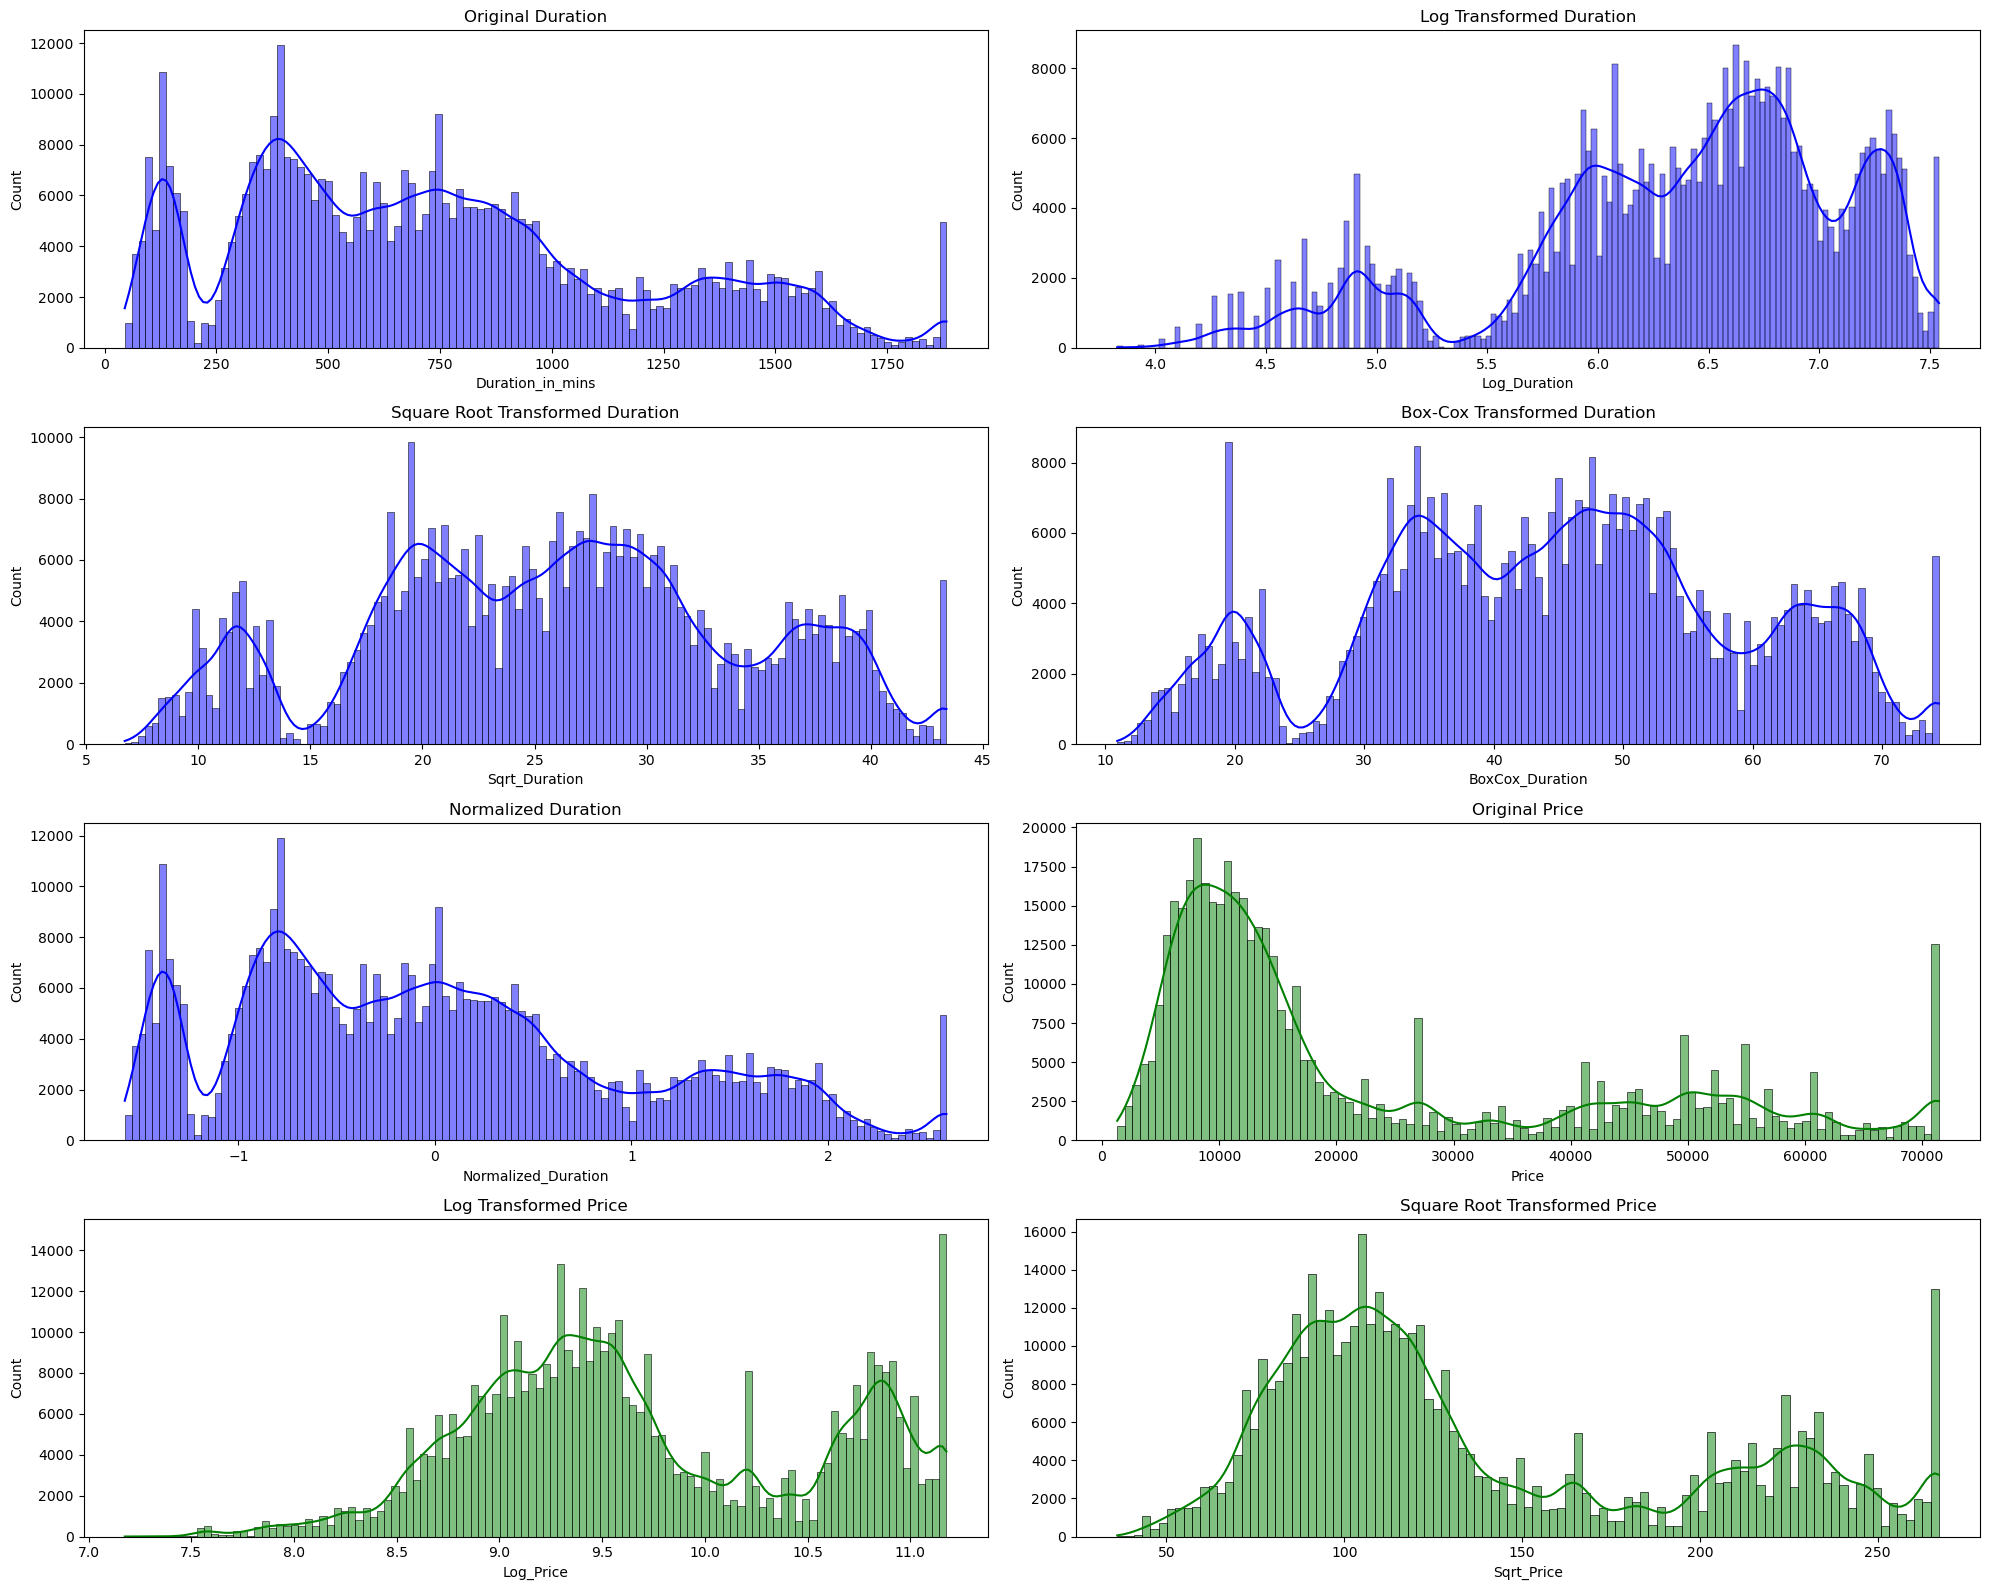

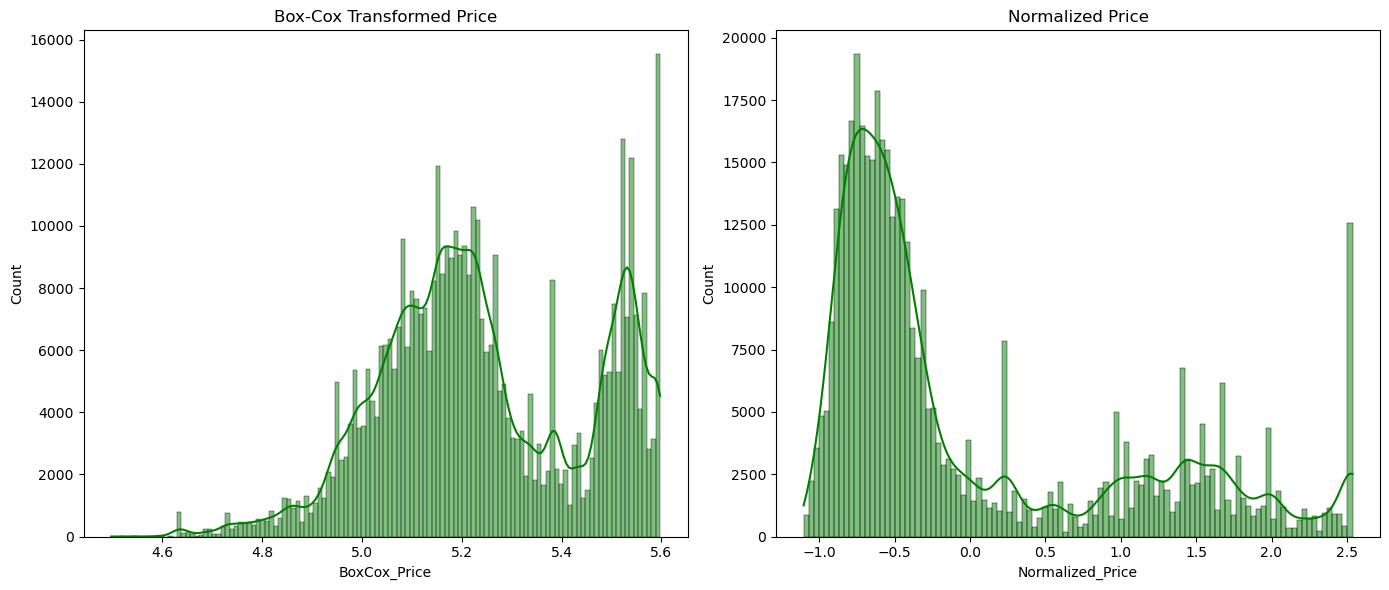

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

# Assuming df_std is your dataframe

# Apply transformations
df_std['Log_Duration'] = np.log(df_std['Duration_in_mins'] + 1)
df_std['Log_Price'] = np.log(df_std['Price'] + 1)

df_std['Sqrt_Duration'] = np.sqrt(df_std['Duration_in_mins'])
df_std['Sqrt_Price'] = np.sqrt(df_std['Price'])

df_std['BoxCox_Duration'], _ = boxcox(df_std['Duration_in_mins'] + 1)
df_std['BoxCox_Price'], _ = boxcox(df_std['Price'] + 1)

scaler = StandardScaler()
df_std['Normalized_Duration'] = scaler.fit_transform(df_std[['Duration_in_mins']])
df_std['Normalized_Price'] = scaler.fit_transform(df_std[['Price']])

# Plotting the distributions
plt.figure(figsize=(20, 16))

# Original Duration
plt.subplot(4, 2, 1)
sns.histplot(df_std['Duration_in_mins'], kde=True, color='blue')
plt.title('Original Duration')

# Log Transformed Duration
plt.subplot(4, 2, 2)
sns.histplot(df_std['Log_Duration'], kde=True, color='blue')
plt.title('Log Transformed Duration')

# Square Root Transformed Duration
plt.subplot(4, 2, 3)
sns.histplot(df_std['Sqrt_Duration'], kde=True, color='blue')
plt.title('Square Root Transformed Duration')

# Box-Cox Transformed Duration
plt.subplot(4, 2, 4)
sns.histplot(df_std['BoxCox_Duration'], kde=True, color='blue')
plt.title('Box-Cox Transformed Duration')

# Normalized Duration
plt.subplot(4, 2, 5)
sns.histplot(df_std['Normalized_Duration'], kde=True, color='blue')
plt.title('Normalized Duration')

# Original Price
plt.subplot(4, 2, 6)
sns.histplot(df_std['Price'], kde=True, color='green')
plt.title('Original Price')

# Log Transformed Price
plt.subplot(4, 2, 7)
sns.histplot(df_std['Log_Price'], kde=True, color='green')
plt.title('Log Transformed Price')

# Square Root Transformed Price
plt.subplot(4, 2, 8)
sns.histplot(df_std['Sqrt_Price'], kde=True, color='green')
plt.title('Square Root Transformed Price')

plt.tight_layout()
plt.show()

# Plotting the Box-Cox and Normalized Price separately
plt.figure(figsize=(14, 6))

# Box-Cox Transformed Price
plt.subplot(1, 2, 1)
sns.histplot(df_std['BoxCox_Price'], kde=True, color='green')
plt.title('Box-Cox Transformed Price')

# Normalized Price
plt.subplot(1, 2, 2)
sns.histplot(df_std['Normalized_Price'], kde=True, color='green')
plt.title('Normalized Price')

plt.tight_layout()
plt.show()


In [58]:
df_std.head()

,Airline_Company,Flight_Class,Departure_City,Arrival_City,Duration_in_mins,Price,Difference_in_days,Journey_day,Journey_month,Departure_Time_hour,...,Arrival_Time_Category,Total_Stops_Clean,Log_Duration,Log_Price,Sqrt_Duration,Sqrt_Price,BoxCox_Duration,BoxCox_Price,Normalized_Duration,Normalized_Price
0,Air India,ECONOMY,Delhi,Hyderabad,745.0,8895.0,139,3,6,19,...,Early Morning,1,6.614726,9.093357,27.294688,94.313308,47.076240,5.102458,0.014414,-0.708783
1,Air India,ECONOMY,Delhi,Hyderabad,760.0,8895.0,139,3,6,9,...,Night,1,6.634633,9.093357,27.568098,94.313308,47.545382,5.102458,0.048545,-0.708783
2,Air India,ECONOMY,Delhi,Hyderabad,815.0,8895.0,50,6,3,17,...,Early Morning,1,6.704414,9.093357,28.548205,94.313308,49.225451,5.102458,0.173693,-0.708783
3,Air India,ECONOMY,Delhi,Hyderabad,820.0,8895.0,139,3,6,8,...,Night,1,6.710523,9.093357,28.635642,94.313308,49.375207,5.102458,0.185071,-0.708783
4,Air India,ECONOMY,Delhi,Hyderabad,835.0,8895.0,139,3,6,22,...,Morning,1,6.728629,9.093357,28.896367,94.313308,49.821633,5.102458,0.219202,-0.708783


In [59]:
# Apply Box-Cox transformation to Duration_in_mins
new_df_cap['Optimal_Transformed_Duration'], _ = boxcox(new_df_cap['Duration_in_mins'] + 1)

# Apply Box-Cox transformation to Price
new_df_cap['Optimal_Transformed_Price'], _ = boxcox(new_df_cap['Price'] + 1)

In [60]:
new_df_cap.head()

,Airline_Company,Flight_Class,Departure_City,Arrival_City,Duration_in_mins,Price,Difference_in_days,Journey_day,Journey_month,Departure_Time_hour,Arrival_Time_hour,Departure_Time_Category,Arrival_Time_Category,Total_Stops_Clean,Optimal_Transformed_Duration,Optimal_Transformed_Price
0,Air India,ECONOMY,Delhi,Hyderabad,745.0,8895.0,139,3,6,19,7,Evening,Early Morning,1,47.076240,5.102458
1,Air India,ECONOMY,Delhi,Hyderabad,760.0,8895.0,139,3,6,9,21,Morning,Night,1,47.545382,5.102458
2,Air India,ECONOMY,Delhi,Hyderabad,815.0,8895.0,50,6,3,17,7,Evening,Early Morning,1,49.225451,5.102458
3,Air India,ECONOMY,Delhi,Hyderabad,820.0,8895.0,139,3,6,8,21,Early Morning,Night,1,49.375207,5.102458
4,Air India,ECONOMY,Delhi,Hyderabad,835.0,8895.0,139,3,6,22,12,Night,Morning,1,49.821633,5.102458


In [61]:
new_df_cap.drop(columns=['Duration_in_mins', 'Price'], inplace=True)

new_df_cap.rename(columns={
    'Optimal_Transformed_Duration': 'Duration_in_mins',
    'Optimal_Transformed_Price': 'Price'
}, inplace=True)

# Verify the changes
new_df_cap.head()


,Airline_Company,Flight_Class,Departure_City,Arrival_City,Difference_in_days,Journey_day,Journey_month,Departure_Time_hour,Arrival_Time_hour,Departure_Time_Category,Arrival_Time_Category,Total_Stops_Clean,Duration_in_mins,Price
0,Air India,ECONOMY,Delhi,Hyderabad,139,3,6,19,7,Evening,Early Morning,1,47.076240,5.102458
1,Air India,ECONOMY,Delhi,Hyderabad,139,3,6,9,21,Morning,Night,1,47.545382,5.102458
2,Air India,ECONOMY,Delhi,Hyderabad,50,6,3,17,7,Evening,Early Morning,1,49.225451,5.102458
3,Air India,ECONOMY,Delhi,Hyderabad,139,3,6,8,21,Early Morning,Night,1,49.375207,5.102458
4,Air India,ECONOMY,Delhi,Hyderabad,139,3,6,22,12,Night,Morning,1,49.821633,5.102458


In [62]:
columns_to_encode = ['Airline_Company', 'Departure_City', 'Arrival_City', 'Departure_Time_Category']

df_encoded = pd.get_dummies(new_df_cap, columns=columns_to_encode)

flight_class_mapping = {
    'ECONOMY': 1,
    'PREMIUMECONOMY': 2,
    'BUSINESS': 3,
    'FIRST': 4
}

df_encoded['Flight_Class_Encoded'] = new_df_cap['Flight_Class'].map(flight_class_mapping)

df_encoded.drop(columns=['Flight_Class'], inplace=True)

new_df_cap = df_encoded

In [63]:
new_df_cap.head()

,Difference_in_days,Journey_day,Journey_month,Departure_Time_hour,Arrival_Time_hour,Arrival_Time_Category,Total_Stops_Clean,Duration_in_mins,Price,Airline_Company_Air India,...,Arrival_City_Hyderabad,Arrival_City_Kolkata,Arrival_City_Mumbai,Departure_Time_Category_Early Morning,Departure_Time_Category_Evening,Departure_Time_Category_Late Night,Departure_Time_Category_Morning,Departure_Time_Category_Night,Departure_Time_Category_Noon,Flight_Class_Encoded
0,139,3,6,19,7,Early Morning,1,47.076240,5.102458,True,...,True,False,False,False,True,False,False,False,False,1
1,139,3,6,9,21,Night,1,47.545382,5.102458,True,...,True,False,False,False,False,False,True,False,False,1
2,50,6,3,17,7,Early Morning,1,49.225451,5.102458,True,...,True,False,False,False,True,False,False,False,False,1
3,139,3,6,8,21,Night,1,49.375207,5.102458,True,...,True,False,False,True,False,False,False,False,False,1
4,139,3,6,22,12,Morning,1,49.821633,5.102458,True,...,True,False,False,False,False,False,False,True,False,1


In [64]:
new_df_cap = new_df_cap.drop(['Departure_Time_hour', 'Arrival_Time_hour'], axis=1)

In [65]:
new_df_cap['Total_Stops_Clean'] = new_df_cap['Total_Stops_Clean'].astype('category')

df_encoded_stops = pd.get_dummies(new_df_cap['Total_Stops_Clean'], prefix='Stops')

new_df_cap.drop('Total_Stops_Clean', axis=1, inplace=True)

new_df_cap = pd.concat([new_df_cap, df_encoded_stops], axis=1)

new_df_cap.head()

,Difference_in_days,Journey_day,Journey_month,Arrival_Time_Category,Duration_in_mins,Price,Airline_Company_Air India,Airline_Company_AirAsia,Airline_Company_AkasaAir,Airline_Company_AllianceAir,...,Departure_Time_Category_Early Morning,Departure_Time_Category_Evening,Departure_Time_Category_Late Night,Departure_Time_Category_Morning,Departure_Time_Category_Night,Departure_Time_Category_Noon,Flight_Class_Encoded,Stops_0,Stops_1,Stops_2
0,139,3,6,Early Morning,47.076240,5.102458,True,False,False,False,...,False,True,False,False,False,False,1,False,True,False
1,139,3,6,Night,47.545382,5.102458,True,False,False,False,...,False,False,False,True,False,False,1,False,True,False
2,50,6,3,Early Morning,49.225451,5.102458,True,False,False,False,...,False,True,False,False,False,False,1,False,True,False
3,139,3,6,Night,49.375207,5.102458,True,False,False,False,...,True,False,False,False,False,False,1,False,True,False
4,139,3,6,Morning,49.821633,5.102458,True,False,False,False,...,False,False,False,False,True,False,1,False,True,False


In [66]:
new_df_cap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449719 entries, 0 to 458868
Data columns (total 39 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Difference_in_days                     449719 non-null  int64  
 1   Journey_day                            449719 non-null  int32  
 2   Journey_month                          449719 non-null  int32  
 3   Arrival_Time_Category                  449719 non-null  object 
 4   Duration_in_mins                       449719 non-null  float64
 5   Price                                  449719 non-null  float64
 6   Airline_Company_Air India              449719 non-null  bool   
 7   Airline_Company_AirAsia                449719 non-null  bool   
 8   Airline_Company_AkasaAir               449719 non-null  bool   
 9   Airline_Company_AllianceAir            449719 non-null  bool   
 10  Airline_Company_GO FIRST               449719 non-null  bool 

In [75]:
new_df_cap.drop(['Arrival_Time_Category'], axis=1, inplace=True)

In [76]:
X = new_df_cap.drop(['Price'], axis=1)

In [77]:
y = new_df_cap['Price']

In [78]:
new_df_cap.head()

,Difference_in_days,Journey_day,Journey_month,Duration_in_mins,Price,Airline_Company_Air India,Airline_Company_AirAsia,Airline_Company_AkasaAir,Airline_Company_AllianceAir,Airline_Company_GO FIRST,...,Departure_Time_Category_Early Morning,Departure_Time_Category_Evening,Departure_Time_Category_Late Night,Departure_Time_Category_Morning,Departure_Time_Category_Night,Departure_Time_Category_Noon,Flight_Class_Encoded,Stops_0,Stops_1,Stops_2
0,139,3,6,47.076240,5.102458,True,False,False,False,False,...,False,True,False,False,False,False,1,False,True,False
1,139,3,6,47.545382,5.102458,True,False,False,False,False,...,False,False,False,True,False,False,1,False,True,False
2,50,6,3,49.225451,5.102458,True,False,False,False,False,...,False,True,False,False,False,False,1,False,True,False
3,139,3,6,49.375207,5.102458,True,False,False,False,False,...,True,False,False,False,False,False,1,False,True,False
4,139,3,6,49.821633,5.102458,True,False,False,False,False,...,False,False,False,False,True,False,1,False,True,False


In [79]:
new_df_cap.to_csv('output.csv')

In [72]:
from sklearn.feature_selection import mutual_info_regression

In [80]:
imp = mutual_info_regression(X , y)

In [ ]:
imp

array([4.54745704e-01, 2.63055132e-01, 2.60839635e-01, 1.97784709e+00,
       3.62847305e-01, 1.04840402e-01, 2.42257080e-02, 7.78945184e-03,
       7.83338045e-02, 2.72471508e-01, 3.95789346e-02, 6.43480375e-04,
       4.37669394e-01, 2.33102377e-01, 3.36477437e-01, 2.81823156e-01,
       3.23488065e-01, 2.75953652e-01, 2.77584803e-01, 3.47895204e-01,
       2.08326565e-01, 3.05924254e-01, 2.51071958e-01, 3.03923134e-01,
       2.48344859e-01, 2.45165793e-01, 2.83576683e-01, 8.63153200e-02,
       8.39034202e-02, 2.29192493e-02, 8.39966575e-02, 6.68002048e-02,
       7.59316590e-02, 8.65878896e-01, 2.83395352e-01, 3.06342668e-01,
       1.35381365e-01])

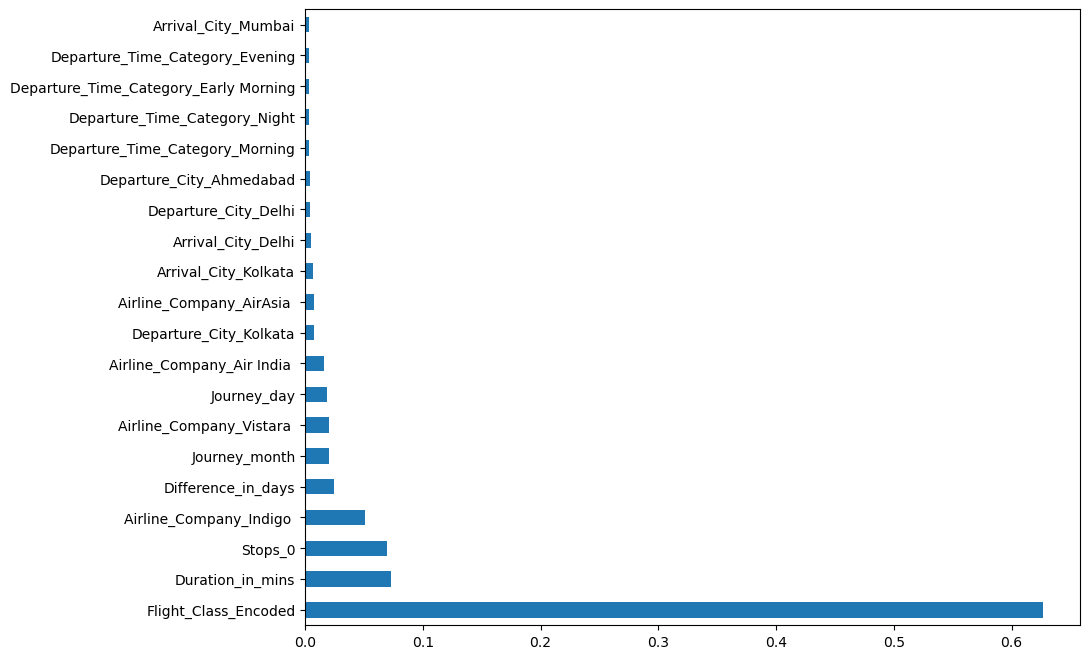

In [81]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

#bar graph of feature importances 
plt.figure(figsize = (10,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=20)

In [83]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

print("Linear Regression Score on Training set is", lin_reg.score(X_train, y_train))
print("Linear Regression Score on Test Set is", lin_reg.score(X_test, y_test))

kfold = KFold(n_splits=5, random_state=1, shuffle=True)

accuracies = cross_val_score(lin_reg, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

accuracies = np.sqrt(-accuracies)

print(accuracies)
print("RMSE: {:.2f}".format(accuracies.mean()))
print("Standard Deviation: {:.2f}".format(accuracies.std()))

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print('RMSE:', np.sqrt(mse))

print('The r2_score is', r2_score(y_test, y_pred))


Linear Regression Score on Training set is 0.7886734720606803
Linear Regression Score on Test Set is 0.7906524247183018
[0.09518717 0.09465745 0.09509918 0.09508591 0.09477231]
RMSE: 0.09
Standard Deviation: 0.00
Mean Absolute Error: 0.07099818957688717
Mean Squared Error: 0.008934860780446542
RMSE: 0.09452439251561759
The r2_score is 0.7906524247183018


In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


dt_reg = DecisionTreeRegressor(random_state=0)

dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)

print("Decision Tree Score on Training set is", dt_reg.score(X_train, y_train))
print("Decision Tree Score on Test Set is", dt_reg.score(X_test, y_test))

kfold = KFold(n_splits=5, random_state=1, shuffle=True)

accuracies = cross_val_score(dt_reg, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

accuracies = np.sqrt(-accuracies)

print(accuracies)
print("RMSE: {:.2f}".format(accuracies.mean()))
print("Standard Deviation: {:.2f}".format(accuracies.std()))

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print('RMSE:', np.sqrt(mse))

print('The r2_score is', r2_score(y_test, y_pred))

Decision Tree Score on Training set is 0.9948062955016516
Decision Tree Score on Test Set is 0.8601883055697016
[0.07829153 0.0782875  0.0784115  0.07801628 0.07738943]
RMSE: 0.08
Standard Deviation: 0.00
Mean Absolute Error: 0.03954136276097667
Mean Squared Error: 0.005967100519469249
RMSE: 0.07724700977687907
The r2_score is 0.8601883055697016


Random Forest Score on Training set is 0.9337219249964751
Random Forest Score on Test Set is 0.9140146132464999
[0.91312058 0.91230745 0.91324872 0.91334355 0.9124316  0.91321025
 0.91063639 0.90923959 0.91121212 0.91232166]
Accuracy: 91.21 %
Standard Deviation: 0.13 %
Mean Absolute Error: 0.0385527097612965
Mean Squared Error: 0.0036698178078327136
RMSE: 0.06057902118582566
The r2_score is 0.9140146132464999


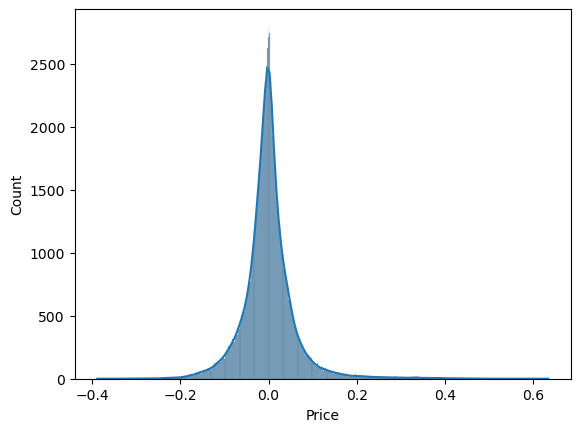

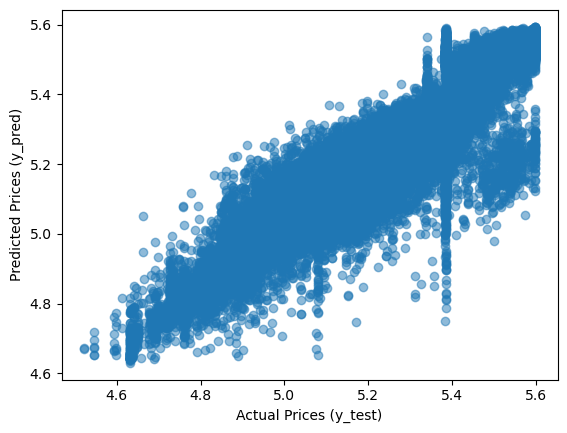

In [86]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming X_train, y_train, X_test, y_test are already defined
# Create the kfold object for cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the Random Forest Regressor with corrected max_features parameter
rf_reg = RandomForestRegressor(
    n_estimators=400,
    min_samples_split=15,
    min_samples_leaf=2,
    max_features='sqrt',  # Changed from 'auto' to 'sqrt'
    max_depth=30
)

# Fit the model
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred = rf_reg.predict(X_test)

# Training and testing accuracy
print("Random Forest Score on Training set is", rf_reg.score(X_train, y_train))
print("Random Forest Score on Test Set is", rf_reg.score(X_test, y_test))

# Cross-validation accuracy
accuracies = cross_val_score(rf_reg, X_train, y_train, cv=kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

# Error metrics
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)

r2 = r2_score(y_test, y_pred)
print('The r2_score is', r2)

# Distribution plot of residuals
sns.histplot(y_test - y_pred, kde=True)
plt.show()

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices (y_test)")
plt.ylabel("Predicted Prices (y_pred)")
plt.show()


In [87]:
# Train and evaluate the XGBRegressor model
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('\033[1m' + 'Error of XGB Regressor:' + '\033[0m')
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('\033[1m' + 'R2 Score of XGB Regressor :' + '\033[0m')
print(r2_score(y_test, y_pred) * 100)

Error of XGB Regressor:
Mean absolute error: 0.04285524527629028
Mean squared error: 0.004097887214315463
Root Mean squared error: 0.064014742163938
R2 Score of XGB Regressor :
90.39847656079606


In [88]:
dtc = ExtraTreesRegressor()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print('\033[1m'+ 'Error of Extra Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test, y_pred)))
print('\033[1m'+'R2 Score of Extra Tree Regressor :'+'\033[0m')
print(r2_score(y_test,y_pred)*100)

Error of Extra Tree Regressor:
Mean absolute error : 0.03617051836825808
Mean squared error : 0.004366912392703879
Root Mean squared error : 0.0660826179316761
R2 Score of Extra Tree Regressor :
89.76813916473283


In [92]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping

model = Sequential()

model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

class LogCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch < 10 or epoch >= (self.params['epochs'] - 10):
            print(f'Epoch {epoch + 1}/{self.params["epochs"]}, Loss: {logs["loss"]}, Val Loss: {logs["val_loss"]}')

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
early_stop_callback = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

callback = LogCallback()

model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[callback, early_stop_callback])

2024-07-05 10:33:29.638581: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-05 10:33:29.639633: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-05 10:33:29.689327: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-05 10:33:29.941315: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-05 10:33:30.974151: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

Epoch 1/100
5614/5622 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9622Epoch 1/100, Loss: 0.5150761604309082, Val Loss: 0.04426736384630203
5622/5622 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 1.9599 - val_loss: 0.0443
Epoch 2/100
5621/5622 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0156Epoch 2/100, Loss: 0.01319163478910923, Val Loss: 0.029516540467739105
5622/5622 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.0156 - val_loss: 0.0295
Epoch 3/100
5617/5622 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0092Epoch 3/100, Loss: 0.008577845990657806, Val Loss: 0.01650160178542137
5622/5622 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0092 - val_loss: 0.0165
Epoch 4/100
5618/5622 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073Epoch 4/100, Loss: 0.007120952010154724, Val Loss: 0.012291433289647102
5622/5622 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0073 - val_loss: 0.0123
Epoch 5/100
5604/5622 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0067Epoch 5/100, Loss: 0.006646286230534315, Val Loss: 0.0076639

In [93]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

11243/11243 ━━━━━━━━━━━━━━━━━━━━ 5s 430us/step
2811/2811 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step


In [97]:
print("Test Results for ANN model:")
print(50 * '-')
print('Mean absolute error:', mean_absolute_error(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for ANN model:
--------------------------------------------------
Mean absolute error: 0.05140400197803997
Mean squared error: 0.005412376970346294
Root Mean squared error: 0.07356885869949523
R-squared:  0.8731857134548578
